In [1]:
import numpy as np

from src.dataset import Dataset
from src.fit.kineticmodel import FirstOrderModel


fname = "/Users/dominikmadea/Documents/Python + JS/pyTSA/gui/src/plotter/wasm/FLD_DMRK23-3E+MB in MeOH.csv"

In [2]:
d = Dataset.from_file(fname, delimiter=',')
model = FirstOrderModel()


In [3]:
model.update_n(5)
model.params

name,value,initial value,min,max,vary
t0,0.00000000,0,-inf,inf,True
t0_mul_1,0.50000000,0.5,-inf,inf,True
t0_lam_1,0.01000000,0.01,-inf,inf,True
t0_mul_2,0.50000000,0.5,-inf,inf,True
t0_lam_2,0.01000000,0.01,-inf,inf,True
tau1,0.10000000,0.1,0.00000000,inf,True
tau2,1.00000000,1,0.00000000,inf,True
tau3,10.0000000,10,0.00000000,inf,True
tau4,100.000000,100,0.00000000,inf,True
tau5,1000.00000,1000,0.00000000,inf,True


In [6]:
model.update_options(include_irf=True, include_variable_fwhm=True, chirp_type='poly')
model.estimate_chirp(np.asarray([300, 400, 500, 600]), np.asarray([2, 2.1, 2.5, 2.6]))
model.params

IndexError: index 5 is out of bounds for axis 0 with size 5

/Users/dominikmadea/Documents/Python + JS/pyTSA/pyTSA/src/plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


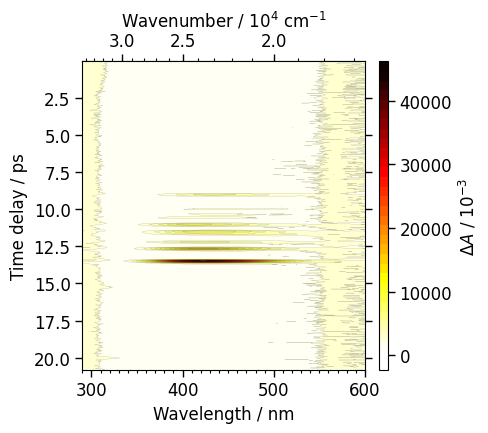

In [3]:
d.plot_data(plot_chirp_corrected=False, cmap='hot_r')
